In [1]:
#Assignment 4 Applied Plotting, Charting and Data Visualizations
#This assignment requires that you to find at least two datasets on the web which are related, 
#and that you visualize these datasets to answer a question with the broad topic of weather phenomena

#Question: How does the level of greenhouse gases and particulate matter in the atmosphere affect the levels of 
#fog in Delhi?

#making necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors

In [2]:
#Datasets gathered from Kaggle

air_quality = pd.read_csv("city_day.csv") #https://www.kaggle.com/rohanrao/air-quality-data-in-india
weather_delhi = pd.read_csv("testset.csv") #https://www.kaggle.com/mahirkukreja/delhi-weather-data

In [3]:
#making necessary conversions and cleaning the data

weather_delhi["datetime_utc"] = pd.to_datetime(weather_delhi["datetime_utc"])
air_quality_delhi = air_quality[air_quality["City"] == "Delhi"]
air_quality_delhi =air_quality_delhi[air_quality_delhi["Date"] <= "2017-01-01"]
weather_delhi = weather_delhi[weather_delhi["datetime_utc"] >= "2015-01-01"]
weather_delhi = weather_delhi[weather_delhi["datetime_utc"] <= "2017-01-01"]

In [4]:
#Visualizing air quality data

air_quality_delhi.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,2015-01-01,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,2015-01-02,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,2015-01-03,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,2015-01-04,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,2015-01-05,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [5]:
#Visualizing weather data

weather_delhi.head()

,datetime_utc,conds,dewptm,fog,hail,heatindexm,hum,precipm,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wgustm,windchillm,wspdm
90000,2015-01-01 00:00:00,Partial Fog,9.0,1,0,NaN,91.0,NaN,1016.0,0,0,10.0,0,0,0.5,NaN,NaN,NaN,NaN,0.0
90001,2015-01-01 03:00:00,Partial Fog,10.0,1,0,NaN,90.0,NaN,1018.0,0,0,11.0,0,0,0.5,NaN,NaN,NaN,NaN,0.0
90002,2015-01-01 06:00:00,Smoke,11.0,0,0,NaN,54.0,NaN,1019.0,0,0,18.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0
90003,2015-01-01 09:00:00,Smoke,11.0,0,0,NaN,43.0,NaN,1016.0,0,0,21.0,0,0,1.0,340.0,NNW,NaN,NaN,7.4
90004,2015-01-01 12:00:00,Haze,12.0,0,0,NaN,54.0,NaN,1016.0,0,0,19.0,0,0,1.0,NaN,NaN,NaN,NaN,0.0


In [6]:
#since we don't require hourly data, we group the values by date and take the mean of all values for a single day.  

weather_delhi_final = weather_delhi.groupby(pd.Grouper(key = "datetime_utc", freq = 'D')).mean()

In [7]:
#range of dates over which we make our observations.

dates = np.array(pd.to_datetime(air_quality_delhi["Date"]))

In [8]:
#Quantity fog which is to be observed. Range is from 0 to 1

fog =  np.array(weather_delhi_final["fog"])

In [9]:
#We need to compare trends and the data indicates fog levels are between 0 and 1, therefore we require pollutant levels and mean temperature, 
#between 0 and 1. We divide each value with it's maximum, thus scaling them down
#Here, a ratio of 0 indicates a lower value and 1 indicates a higher value

mean_temp = np.array(weather_delhi_final["tempm"])
mean_temp = mean_temp/max(mean_temp)
pm25 = np.array(air_quality_delhi["PM2.5"])
pm25 = pm25/max(pm25)
pm10 = np.array(air_quality_delhi["PM10"])
pm10 = pm10/max(pm10)
so2 = np.array(air_quality_delhi["SO2"])
so2 = so2/max(so2)
no2 = np.array(air_quality_delhi["NO2"])
no2 = no2/max(no2)
co = np.array(air_quality_delhi["CO"])
co = co/max(co)

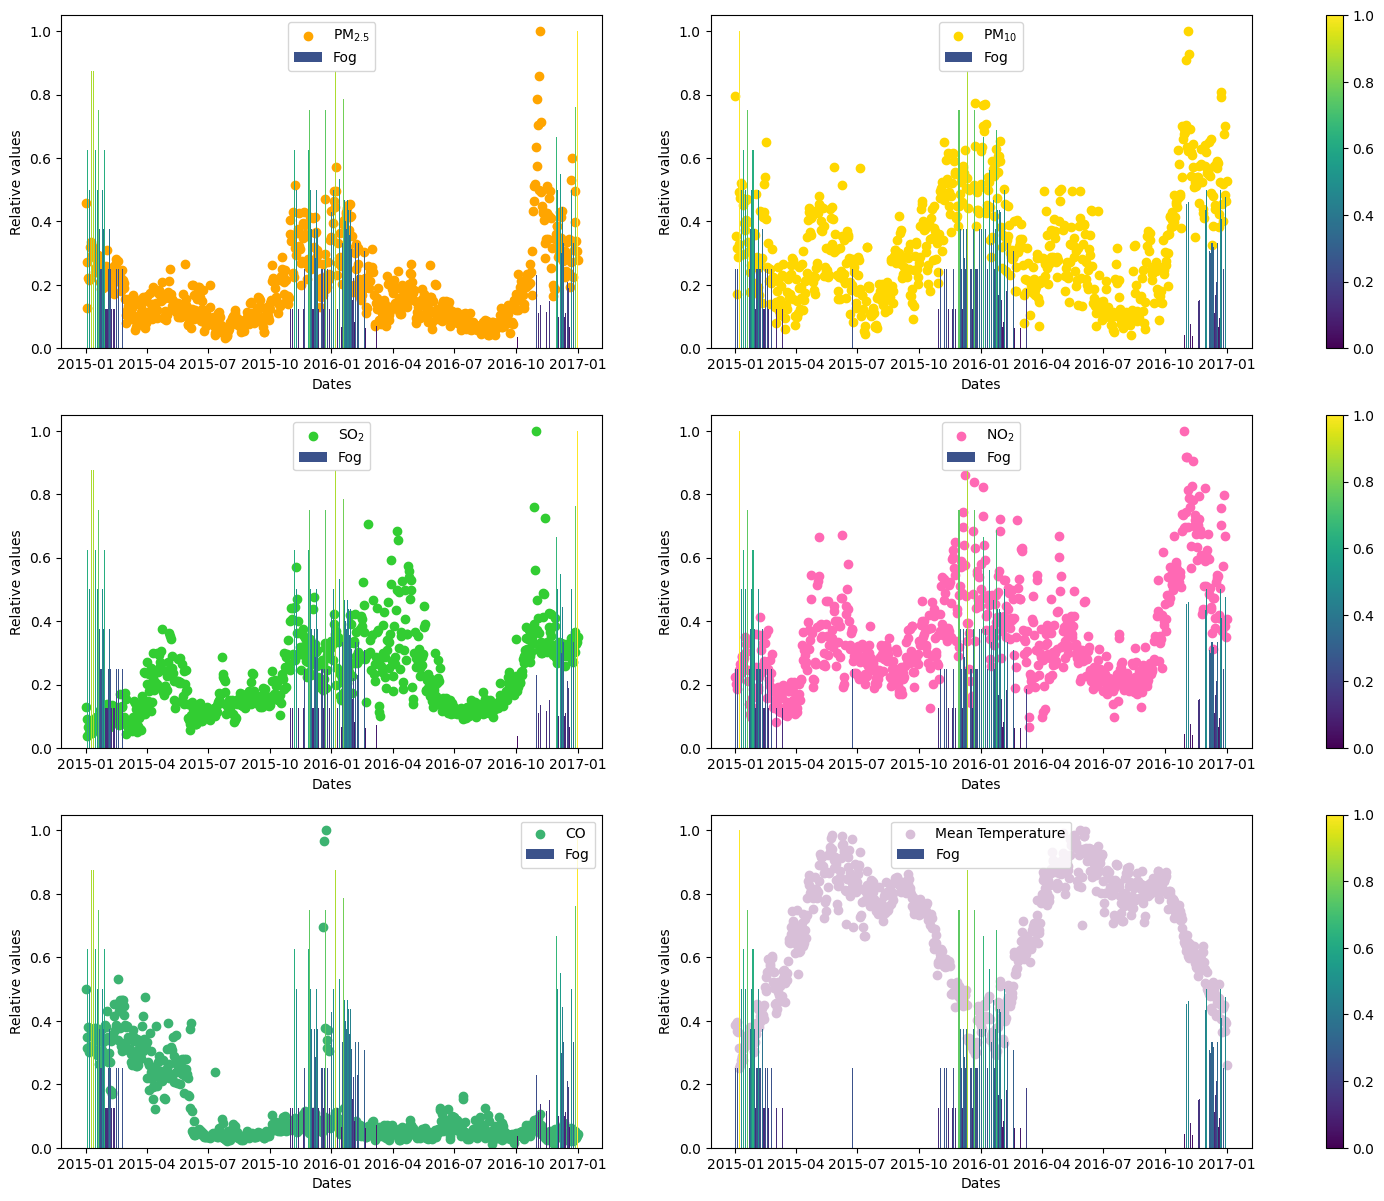

In [10]:
#making the subplots and plotting the data

fig, axs = plt.subplots(3, 2, figsize = (1920/100, 1500/100), dpi = 100)

cmap = cm.get_cmap('viridis')
cpick = cm.ScalarMappable(cmap=cmap, norm=colors.Normalize(vmin=0, vmax=1.0))
cpick.set_array([])

for i in axs:
    plt.colorbar(cpick, orientation = "vertical", ax = i)

axs[0, 0].bar(dates, fog, label = "Fog", color = cpick.to_rgba(fog))
axs[0, 0].scatter(dates, pm25, c = 'orange', label = "PM$_{2.5}$")
axs[0, 0].legend()
axs[0, 0].set_xlabel("Dates")
axs[0, 0].set_ylabel("Relative values")

axs[0, 1].bar(dates, fog, label = "Fog", color = cpick.to_rgba(fog))
axs[0, 1].scatter(dates, pm10, c = 'gold', label = "PM$_{10}$")
axs[0, 1].legend()
axs[0, 1].set_xlabel("Dates")
axs[0, 1].set_ylabel("Relative values")

axs[1, 0].bar(dates, fog, label = "Fog", color = cpick.to_rgba(fog))
axs[1, 0].scatter(dates, so2, c = 'limegreen', label = "SO$_{2}$")
axs[1, 0].legend()
axs[1, 0].set_xlabel("Dates")
axs[1, 0].set_ylabel("Relative values")

axs[1, 1].bar(dates, fog, label = "Fog", color = cpick.to_rgba(fog))
axs[1, 1].scatter(dates, no2, c = 'hotpink', label = "NO$_{2}$")
axs[1, 1].legend()
axs[1, 1].set_xlabel("Dates")
axs[1, 1].set_ylabel("Relative values")

axs[2, 0].bar(dates, fog, label = "Fog", color = cpick.to_rgba(fog))
axs[2, 0].scatter(dates, co, c = 'mediumseagreen', label = "CO")
axs[2, 0].legend()
axs[2, 0].set_xlabel("Dates")
axs[2, 0].set_ylabel("Relative values")

axs[2, 1].bar(dates, fog, label = "Fog", color = cpick.to_rgba(fog))
axs[2, 1].scatter(dates, mean_temp, c = 'thistle', label = "Mean Temperature")
axs[2, 1].legend()
axs[2, 1].set_xlabel("Dates")
axs[2, 1].set_ylabel("Relative values")

fig.savefig('Assignment4.jpeg', edgecolor = 'black', dpi = 1000, transparent=True)